# Notebook of the various different plots used in Lecture 3

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Make default plotsize bigger
matplotlib.rcParams['figure.figsize'] = 11, 8

In [ ]:
# Load the titanic dataset and print the first few rows
df = pd.read_csv('https://raw.githubusercontent.com/jbryer/CompStats/master/Data/titanic3.csv')
df.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

## Visualizing the data distribution

In [ ]:
# Plot a histogram of fares, ignoring missing values
fare = df['fare'].dropna()
r = hist(fare, bins=30)
xlabel('fare'); ylabel('count')

Text(0,0.5,u'count')

In [ ]:
# What happens when we use a histogram with too many bins...
ages = df['age'].dropna()
plt.hist(ages, bins=100)
xlabel('Age (years)'); ylabel('count'); 
title('Age of passengers aboard the Titanic')

Text(0.5,1,u'Age of passengers aboard the Titanic')

Text(0.5,1,u'Age of pasengers aboard the Titanic')

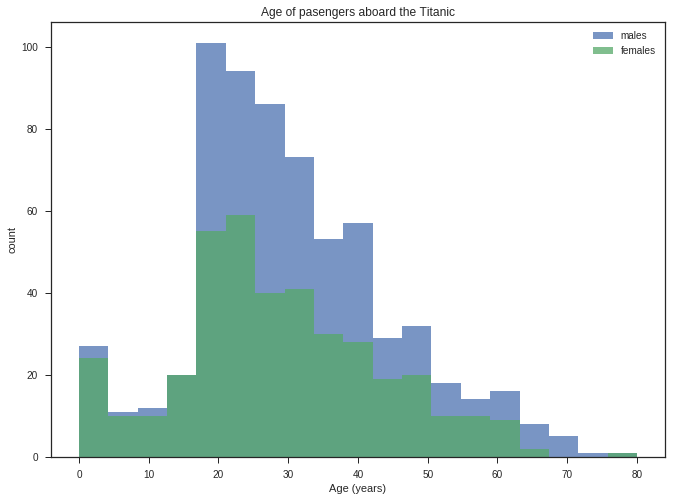

In [ ]:
# Using histograms to compare distribution of male and female ages
bins = linspace(0, 80, 20)
male_ages = df[df['sex'] == 'male']['age'].dropna()
female_ages = df[df['sex'] == 'female']['age'].dropna()

hist(male_ages, bins=bins, label='males', alpha=0.75)
hist(female_ages, bins=bins, label='females', alpha=0.75)

# Label
xlabel('Age (years)'); ylabel('count'); 
legend()
title('Age of pasengers aboard the Titanic')

### Density plots

In [ ]:
# Density plots
sns.distplot(ages, hist=False)
xlabel('age'); ylabel('P(age)')

Text(0,0.5,u'P(age)')

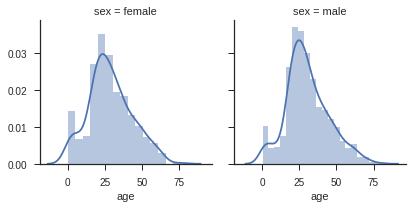

In [ ]:
# Facet grids to compare P(age|sex)
g = sns.FacetGrid(df, col='sex')
g.map(sns.distplot, 'age')

The kernel density estimators use a kernel function to weight the contribution of nearby data points. Two common kernels are the Gaussian kernel and the uniform kernel. 

In [ ]:
# Plotting a Gaussian kernel
x = linspace(-4,4,100)
y = (1.0 / np.sqrt(2*np.pi)) * np.exp(-0.5*x**2)

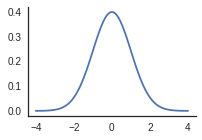

In [ ]:
sns.set_style("white")
figure(figsize=(3,2))
plot(x, y)
sns.despine()

In [ ]:
# Uniform kernel
y = 0.5 * (np.abs(x) <= 1)

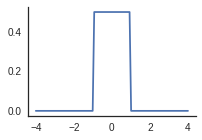

In [ ]:
figure(figsize=(3,2))
plot(x, y)
sns.despine()

In [ ]:
sns.set_style("darkgrid")

In [ ]:
def tickoff():
    """Utility function to turn off axis ticks"""
    tick_params(
        axis='both', 
        which='both', 
        bottom='off',
        top='off', 
        left='off',
        labelleft='off',
        labelbottom='off') 

If the kernel bandwidth is too high, then the distribution details are smoothed out. If it is too small, then the estimate will be very noisy

In [ ]:
# Density plot with large bandwidth
figure(figsize=(6,3))
sns.kdeplot(ages, bw=10)
tickoff()

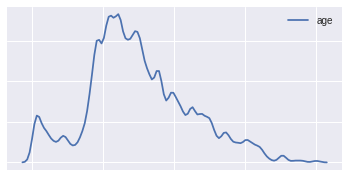

In [ ]:
# Density plot with small bandwidth
figure(figsize=(6,3))
sns.kdeplot(ages, bw=1)
tickoff()

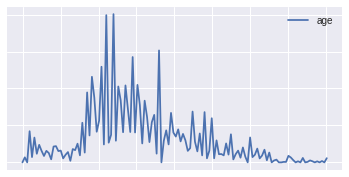

In [ ]:
# Density plot with very small bandwidth
figure(figsize=(6,3))
sns.kdeplot(ages, bw=0.1)
tickoff()

In [ ]:
# Mean value imputation
ages = df['age'].copy()
ages[np.isnan(ages)] = np.mean(ages)
fares = df['fare'].copy()
fares[np.isnan(fares)] = np.mean(fare)

## Joint distributions

In [ ]:
# Load the tips dataset
tips = sns.load_dataset("tips")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

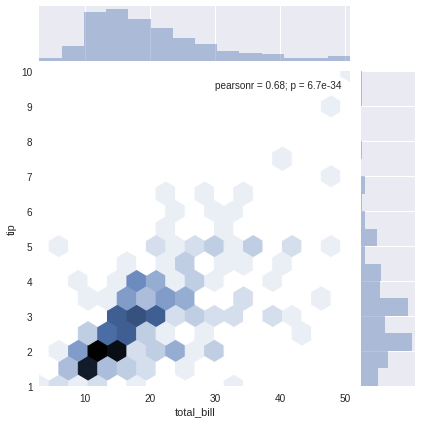

In [ ]:
# Joint plot of tips and total bill
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

## Boxplot and violins

In [ ]:
# Box plot of tips|day
sns.boxplot(x="day", y="total_bill", data=tips)

In [ ]:
# Violin plot of tip|time
figure(figsize=(4,4))
ax = sns.violinplot(
    x="time", y="tip", data=tips,
    order=["Dinner", "Lunch"])

In [ ]:
# Strip plot of total_bill|day without jitter
figure(figsize=(5,2))
sns.stripplot(x="day", y="total_bill", data=tips, size=4.5)

In [ ]:
# Strip plot with jitter
figure(figsize=(5,2))
sns.stripplot(x="day", y="total_bill", data=tips, size=4.5, jitter=True)

## Scatterplots

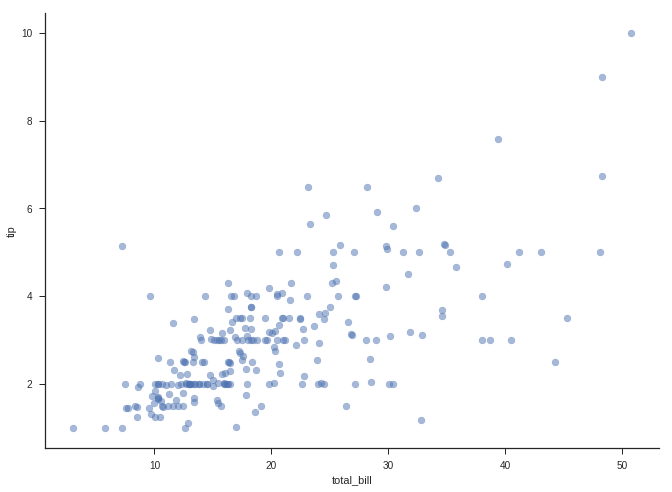

In [ ]:
# Scatter plot of relationship between bill and tip
sns.set_style('ticks')
scatter(tips['total_bill'], tips['tip'], alpha=0.5)
xlabel('total_bill'); ylabel('tip')
sns.despine()

In [ ]:
# The Iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [ ]:
# Scatter plot of petal_width vs petal_length
sns.lmplot(
    "petal_width", "petal_length", data=iris, 
    size=3, fit_reg=False, legend=False)
sns.despine(left=True, bottom=True)

In [ ]:
# Scatter plot of petal_width vs petal_length, using color to indicate species

sns.lmplot(
    "petal_width", "petal_length", data=iris, 
    hue='species', size=3, fit_reg=False, legend=False)
legend(loc="lower right")
sns.despine(left=True, bottom=True)

In [ ]:
# Pairplots for the Iris dataset
sns.pairplot(iris, hue='species')

## Contour plots and images

In [ ]:
# Illustration of visualizing a function from R^2 to R using contour plots

# Generate a mesh grid of points to evaluate the function on.
xs = linspace(-5, 5, 100)
ys = linspace(-5, 5, 100)
X, Y = meshgrid(xs, ys)

# Define our function from R^2 -> R
f = lambda x, y: np.sin(x) * np.cos(y)

# Evaluate the function on our mesh grid
Z = f(X, Y)

# Use contour f to generate a filled contour plot
figure(figsize=(5,3))
contourf(X, Y, Z, 
         levels=linspace(-1, 1., 21), 
         cmap=cm.coolwarm)

# Add the colorbar on the right
colorbar()

In [ ]:
# Using an image to represent the dependant variable
imshow(Z, cmap=cm.gray)
axis('off')
tight_layout()

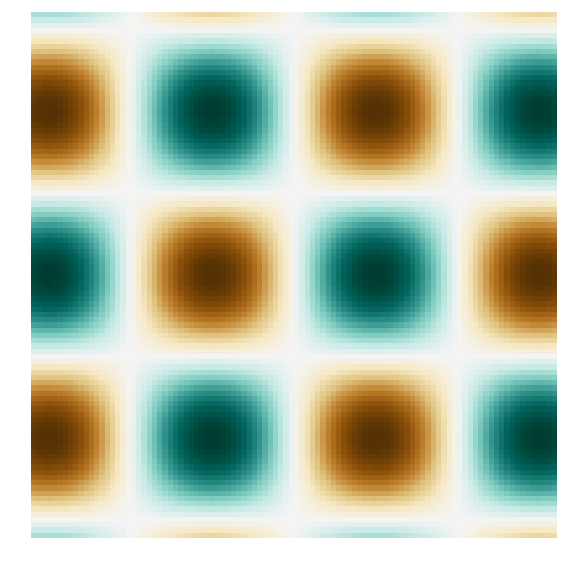

In [ ]:
# Adjusting the colormap
imshow(Z, cmap=cm.BrBG)
axis('off')
tight_layout()

## Regression plots

In [ ]:
# Linear regression plot
sns.set_style('darkgrid')
sns.regplot('total_bill', 'tip', data=tips)

In [ ]:
# Generate some random data. y = (ax + b) + noise
xs = np.random.rand(100)
a = 6
b = 10
# zero mean Gaussian noise with standard deviation 0.5
noise = np.random.randn(100) * 0.5
ys = a * xs + b + noise

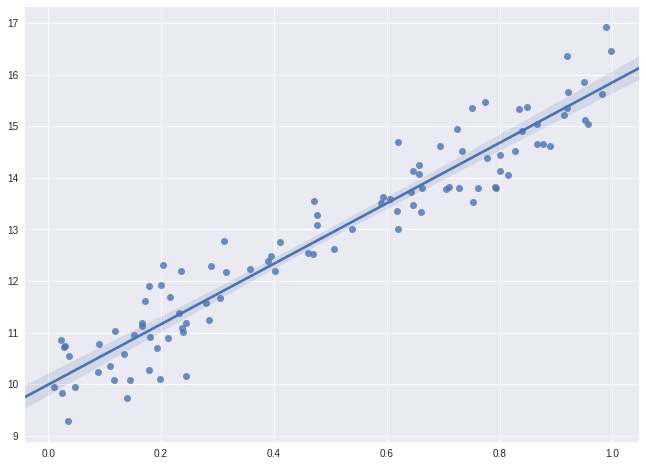

In [ ]:
# Regression plot. Note that because there is a real linear relationship and the 
# errors are normally distribtuted, the confidence interval is tight
sns.regplot(xs, ys)

In [ ]:
ys = np.exp(a * xs + b + noise) 

In [ ]:
# non-linear correlation
figure(figsize=(5,3))
sns.regplot(xs, ys, fit_reg=False)
xlabel('x'); ylabel('y')

Text(0,0.5,u'y')

Text(0,0.5,u'log(y)')

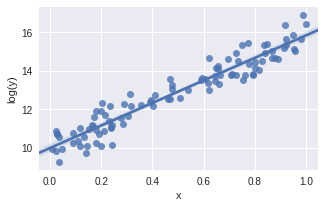

In [ ]:
# Linear on a log scale 
figure(figsize=(5,3))
sns.regplot(xs, np.log(ys), fit_reg=True)
xlabel('x'); ylabel('log(y)')

In [ ]:
# Load Ascombe's quartet
anscombe = sns.load_dataset('anscombe')

(2, 20)

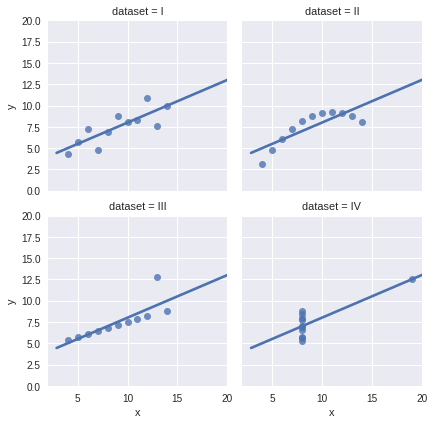

In [ ]:
# Plot Ascombe's quartet
# Note that the regression line is the same for all datasets
sns.lmplot(
    x='x', y='y', 
    data=anscombe, 
    col='dataset', 
    col_wrap=2,
    size=3,
    ci=False)
ylim(0, 20)
xlim(2, 20)

## Time series

Text(0,0.5,u'y')

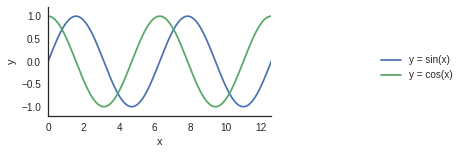

In [ ]:
# Time series plot of generated data
sns.set_style('white')
x = linspace(0, 8*pi, 200)
figure(figsize=(4,2))
plot(x, sin(x), label='y = sin(x)')
plot(x, cos(x), label='y = cos(x)')
ylim(-1.2, 1.2)
xlim(0, 4*pi)
legend(bbox_to_anchor=(1.45, .64))
sns.despine()
xlabel('x'); ylabel('y')

Upload the AirPassengers.csv dataset here!

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


Text(0.5,1,u'Monthly Airline Passenger Numbers')

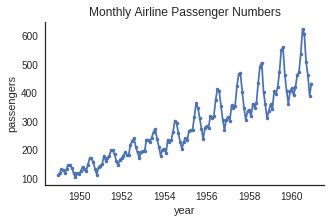

In [ ]:
# Time series plot of real data
air = pd.read_csv('AirPassengers.csv')
figure(figsize=(5,3))
plot(air.time, air.AirPassengers, marker='.')
sns.despine()
xlabel('year')
ylabel('passengers')
title('Monthly Airline Passenger Numbers')

## Bar charts

In [ ]:
# Chicken feed dataset. Pandas supports dataset loading from a URL
chicken = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/chickwts.csv')

In [ ]:
chicken.head() 

Unnamed: 0  weight       feed
0           1     179  horsebean
1           2     160  horsebean
2           3     136  horsebean
3           4     227  horsebean
4           5     217  horsebean

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,u'Chicken weight by feed type')

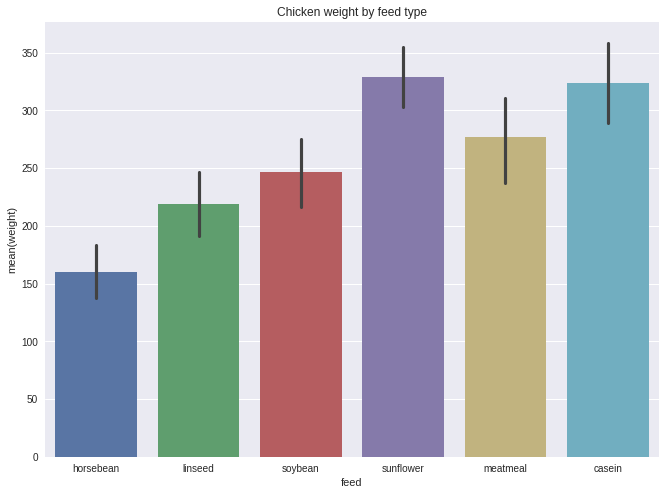

In [ ]:
# Comparing mean weight conditioned on feed type
sns.set_style('darkgrid')
sns.barplot('feed', 'weight', data=chicken)
title('Chicken weight by feed type')

In [ ]:
# Reordering the bars by weight
means = chicken.groupby('feed')['weight'].mean()

In [ ]:
order = means.sort_values().index

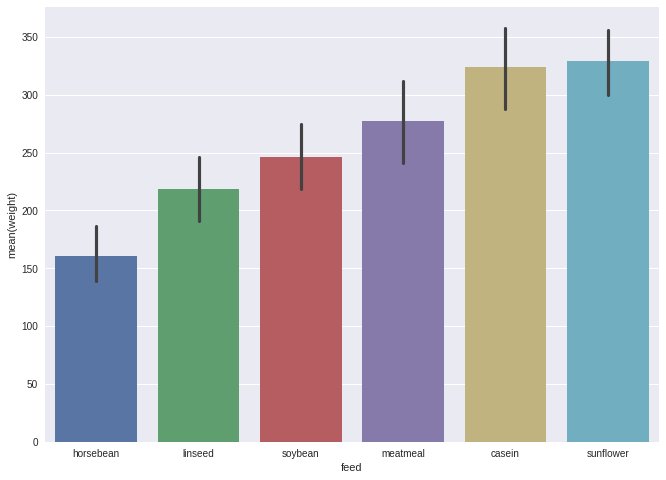

In [ ]:
sns.barplot('feed', 'weight', data=chicken, order=order)

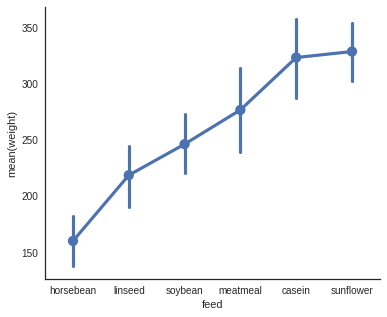

In [ ]:
# Using a line plot instead: DON'T DO THIS!! It doesn't make sense to interpolate between categories
sns.set_style('white')
figure(figsize=(6,5))
sns.pointplot('feed', 'weight', data=chicken, order=order, linestyles=['-'])
sns.despine()

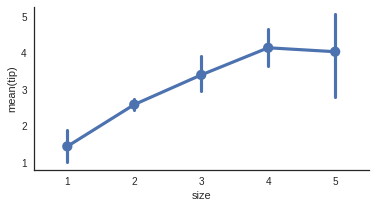

In [ ]:
# Same as above, but for tips data. This time it makes sense (sizes are ordinal)
sns.set_style('white')
tips = sns.load_dataset("tips")
figure(figsize=(6,3))
sns.pointplot('size', 'tip', data=tips, order=range(1,6))
sns.despine()

## Color palettes

In [ ]:
# How to show a color palette in seaborn
sns.palplot(sns.color_palette('gray'), 5)

In [ ]:
# Don't use Jet!
sns.color_palette('jet', 7)

ValueError: ignored